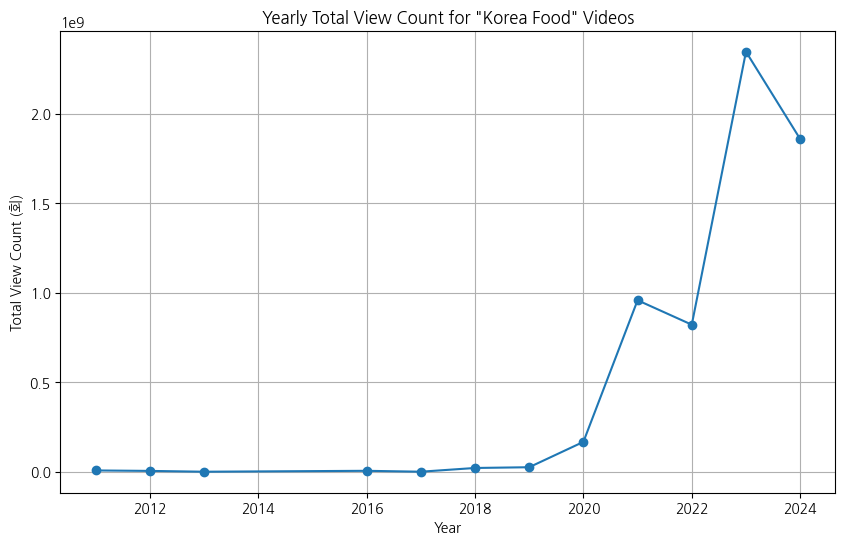

In [8]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import koreanize_matplotlib

# Load the data
file_path = 'result_korea_food.csv'
data = pd.read_csv(file_path)

# Function to convert view count to integer
def convert_view_count(view_count_str):
    if isinstance(view_count_str, str):
        if '억' in view_count_str:
            return int(float(re.sub(r'[^\d.]', '', view_count_str)) * 100000000)
        elif '만' in view_count_str:
            return int(float(re.sub(r'[^\d.]', '', view_count_str)) * 10000)
        else:
            # Remove non-digit characters and convert to integer
            numeric_str = re.sub(r'[^\d]', '', view_count_str)
            return int(numeric_str) if numeric_str else 0
    return 0

# Apply the function to the 'View Count' column
data['View Count'] = data['View Count'].apply(convert_view_count)

# Convert 'Absolute Upload Date' to datetime
data['Absolute Upload Date'] = pd.to_datetime(data['Absolute Upload Date'])

# Extract the year from 'Absolute Upload Date'
data['Year'] = data['Absolute Upload Date'].dt.year

# Group by year and sum the view counts
yearly_views = data.groupby('Year')['View Count'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(yearly_views['Year'], yearly_views['View Count'], marker='o')
plt.xlabel('Year')
plt.ylabel('Total View Count (회)')
plt.title('Yearly Total View Count for "Korea Food" Videos')
plt.grid(True)
plt.show()


In [9]:
yearly_views['View Count']

0        7110000
1        4560000
2             93
3        5080000
4          84000
5       20909074
6       25090000
7      166682045
8      957687252
9      821220240
10    2345893739
11    1858130535
Name: View Count, dtype: int64

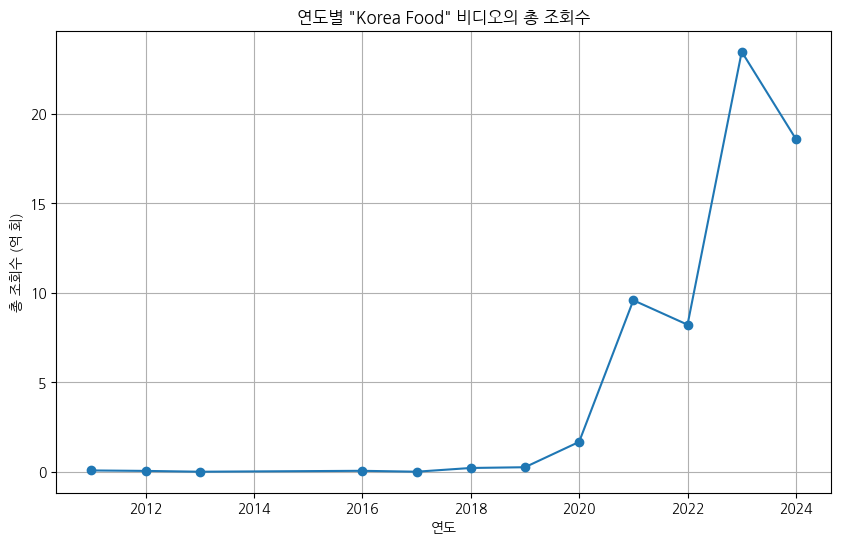

In [10]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import koreanize_matplotlib

# Load the data
file_path = 'result_korea_food.csv'
data = pd.read_csv(file_path)

# Function to convert view count to integer
def convert_view_count(view_count_str):
    if isinstance(view_count_str, str):
        if '억' in view_count_str:
            return float(re.sub(r'[^\d.]', '', view_count_str)) * 100000000
        elif '만' in view_count_str:
            return float(re.sub(r'[^\d.]', '', view_count_str)) * 10000
        else:
            # Remove non-digit characters and convert to float
            numeric_str = re.sub(r'[^\d]', '', view_count_str)
            return float(numeric_str) if numeric_str else 0
    return 0

# Apply the function to the 'View Count' column
data['View Count'] = data['View Count'].apply(convert_view_count)

# Convert 'Absolute Upload Date' to datetime
data['Absolute Upload Date'] = pd.to_datetime(data['Absolute Upload Date'])

# Extract the year from 'Absolute Upload Date'
data['Year'] = data['Absolute Upload Date'].dt.year

# Convert view count to billions for better readability
data['View Count (억)'] = data['View Count'] / 100000000

# Group by year and sum the view counts
yearly_views = data.groupby('Year')['View Count (억)'].sum().reset_index()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(yearly_views['Year'], yearly_views['View Count (억)'], marker='o')
plt.xlabel('연도')
plt.ylabel('총 조회수 (억 회)')
plt.title('연도별 "Korea Food" 비디오의 총 조회수')
plt.grid(True)
plt.show()


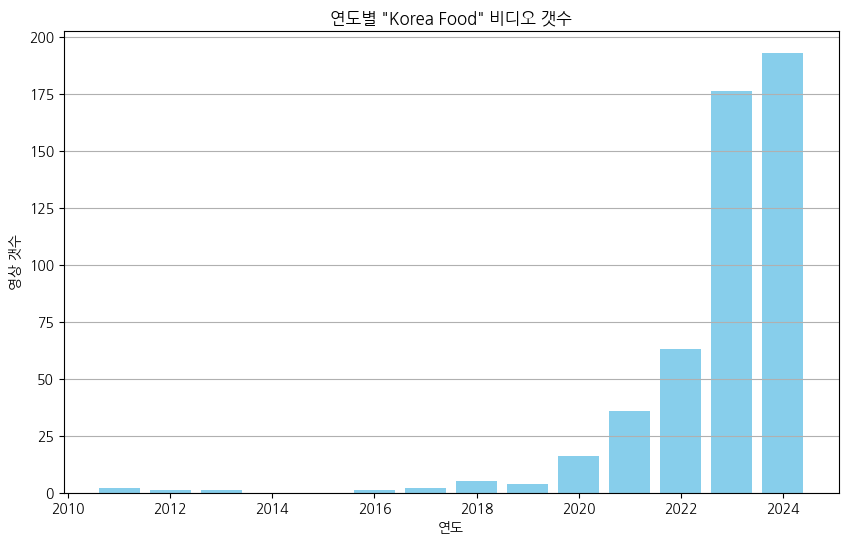

In [14]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# Load the data
file_path = 'result_korea_food.csv'
data = pd.read_csv(file_path)

# Function to convert view count to integer
def convert_view_count(view_count_str):
    if isinstance(view_count_str, str):
        if '억' in view_count_str:
            return float(re.sub(r'[^\d.]', '', view_count_str)) * 100000000
        elif '만' in view_count_str:
            return float(re.sub(r'[^\d.]', '', view_count_str)) * 10000
        else:
            # Remove non-digit characters and convert to float
            numeric_str = re.sub(r'[^\d]', '', view_count_str)
            return float(numeric_str) if numeric_str else 0
    return 0

# Apply the function to the 'View Count' column
data['View Count'] = data['View Count'].apply(convert_view_count)

# Convert 'Absolute Upload Date' to datetime
data['Absolute Upload Date'] = pd.to_datetime(data['Absolute Upload Date'])

# Extract the year from 'Absolute Upload Date'
data['Year'] = data['Absolute Upload Date'].dt.year

# Count the number of videos per year
yearly_video_counts = data['Year'].value_counts().sort_index().reset_index()
yearly_video_counts.columns = ['Year', 'Video Count']



# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(yearly_video_counts['Year'], yearly_video_counts['Video Count'], color='skyblue')
plt.xlabel('연도')
plt.ylabel('영상 갯수')
plt.title('연도별 "Korea Food" 비디오 갯수')
plt.grid(True, axis='y')
plt.show()


